In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('antihyperglycemia.csv', index_col='Name_Short')

In [3]:
df = df.drop(['Number', 'Name_Thai', 'Name_Sci'], axis=1)
df.head()

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0


In [4]:
df =df.rename(columns={'Emax_amylase_2.75mcgml' : 'Emax_amylase', 'Emax_glucosidase_0.67mcgml' : 'Emax_glucosidase'})

In [5]:
df

,Emax_amylase,Emax_glucosidase,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0
P_anamense,35.1,54.5,NaN,0.52,inactive,active,3,0,0,3,3,3,2,0
A_marginata,16.0,37.6,NaN,NaN,inactive,inactive,0,0,0,2,0,3,3,0
E_cherrevensis,77.8,39.8,0.18,NaN,active,inactive,5,0,1,2,0,3,0,0
F_indica,84.4,39.1,0.16,NaN,active,inactive,3,1,0,3,3,2,2,0


In [6]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]

In [7]:
fingerprint_to_model.head()

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0


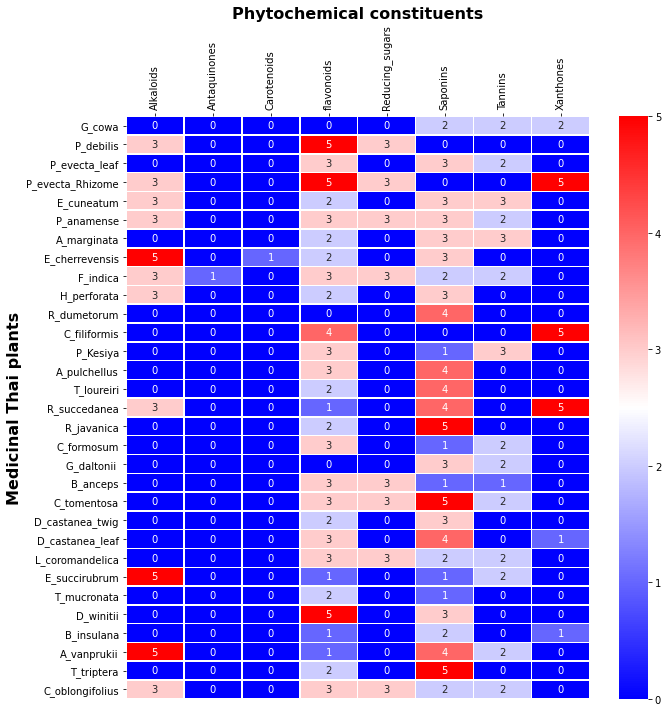

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(fingerprint_to_model, annot=True, cmap='bwr',linewidths=.5)
ax.tick_params(labelbottom=False, labeltop=True)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.ylabel('Medicinal Thai plants', weight='bold', fontsize=16)
plt.title('Phytochemical constituents', weight='bold', fontsize=16)
plt.tight_layout()
plt.savefig('phytocomponents_heatmap.pdf', dpi=500, bbox_inches='tight')